# NetCDF Examples

In [1]:
import igrat
import numpy as np

In [2]:
# Parse the data for station USM00072402 and save to a .csv file.
data = igrat.read_station_data("USM00072435", file_type="netcdf")

Extracting data for station USM00072435...
Successfully downloaded and extracted data for USM00072435
Found 4390 soundings with maximum 214 levels
Successfully created NetCDF file: /Users/peterphan/Desktop/igrat/igrat/USM00072435-main.nc


In [ ]:
!ncdump -h USM00072435-main.nc

In [ ]:
# Get raw availability from a DataFrame
availability = igrat.get_availability(data)

# Get number of soundings
num_soundings = igrat.get_num_soundings(data)

# Get available years
years = igrat.get_years(data)

# Get months for the first year
months = igrat.get_months(data, years[0])

# Get days for the first month of the first year
days = igrat.get_days(data, years[0], months[0])

# Get times for a specific date
times = igrat.get_times(data, years[0], months[0], days[0])

print(f"Number of soundings: {num_soundings}")
print(f"Available years: {years}")
print(f"Available months for the first year: {months}")
print(f"Available days for the first month of the first year: {days}")
print(f"Available times for the first day of the first month of the first year: {times}")

/Users/peterphan/Desktop/igrat/igrat/igrat.py:2077: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'num_profiles' in data.dims and data.dims['num_profiles'] == 1:


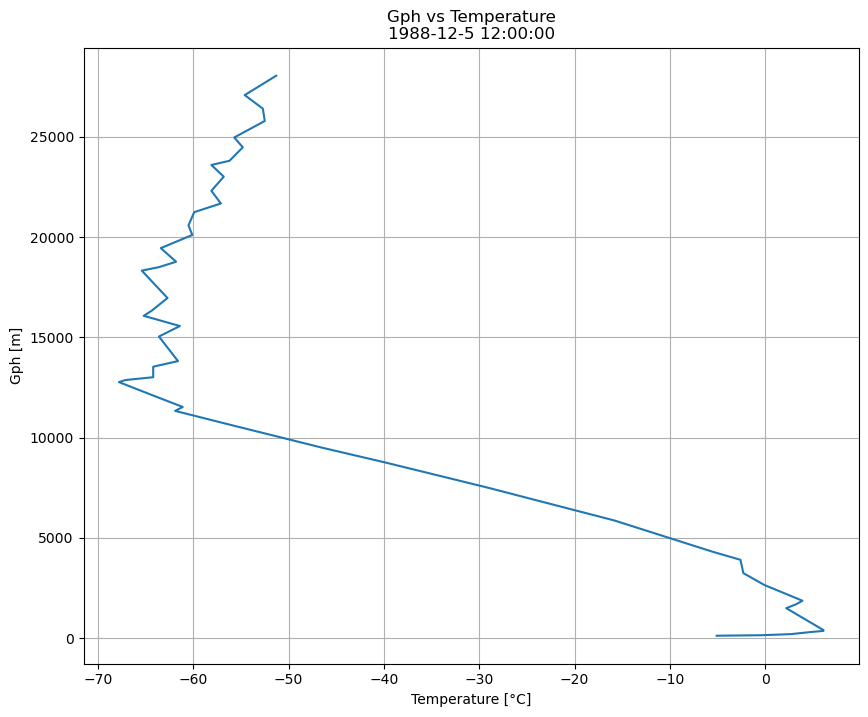

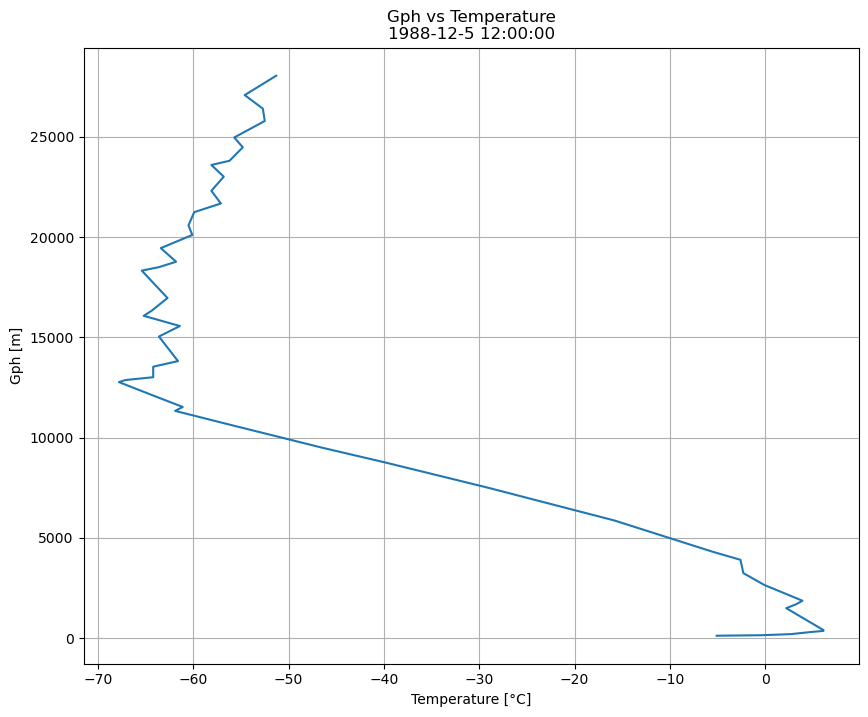

In [3]:
# Plot profile of temperature vs height for a specific date and time
igrat.plot_profile(data, 'temperature', 'gph', '1988-12-5', '12:00:00')

Looking for date: 19950201, time: 12
Available dates range: 19881205 to 19950207
Available times range: 0 to 23
[[ 4.200e+00 -9.999e+03  8.800e+00 -9.999e+03  8.400e+00 -9.999e+03
   5.800e+00 -9.999e+03 -9.999e+03 -7.000e-01 -9.999e+03 -9.999e+03
  -3.300e+00 -3.500e+00 -9.999e+03 -9.999e+03 -8.100e+00 -9.999e+03
  -1.050e+01 -9.999e+03 -1.750e+01 -1.830e+01 -2.110e+01 -9.999e+03
  -3.210e+01 -3.590e+01 -9.999e+03 -3.790e+01 -9.999e+03 -4.110e+01
  -9.999e+03 -4.810e+01 -9.999e+03 -9.999e+03 -5.390e+01 -5.450e+01
  -5.350e+01 -9.999e+03 -5.270e+01 -9.999e+03 -5.250e+01 -5.310e+01
  -9.999e+03 -5.690e+01 -9.999e+03 -9.999e+03 -6.030e+01 -9.999e+03
  -6.130e+01 -9.999e+03 -9.999e+03 -6.330e+01 -9.999e+03 -9.999e+03
  -6.430e+01 -6.530e+01 -9.999e+03 -6.210e+01 -9.999e+03 -9.999e+03
  -6.450e+01 -9.999e+03 -9.999e+03 -9.999e+03 -6.230e+01 -9.999e+03
  -9.999e+03 -9.999e+03 -9.999e+03 -6.250e+01 -9.999e+03 -6.050e+01
  -9.999e+03 -9.999e+03 -9.999e+03 -9.999e+03 -5.470e+01 -5.390e+01
    

/Users/peterphan/Desktop/igrat/igrat/igrat.py:2077: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'num_profiles' in data.dims and data.dims['num_profiles'] == 1:


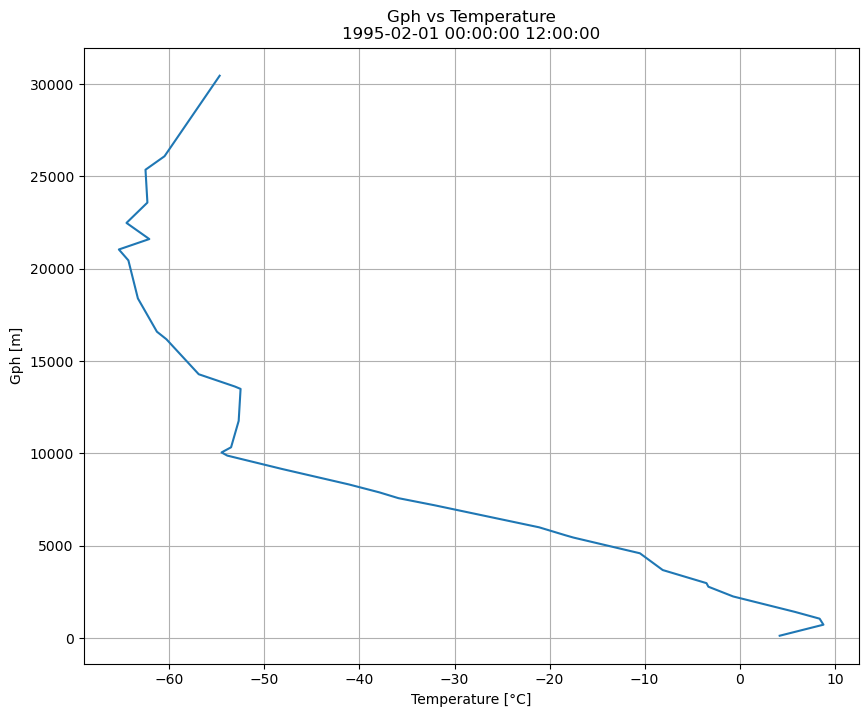

In [4]:
# Isolate a specific date and time
profile = igrat.get_profile(data, '1995-02-01', '12:00:00')

print(profile['temperature'].values)
print(profile['gph'].values)
print(profile.coords)
print(profile.attrs)

# If the data is just a single profile, you can plot it without specifying date and time
fig = igrat.plot_profile(profile, 'temperature', 'height')


In [6]:
# Linear interpolation of the temperature profile 
# interpolated_profile = igrat.interp_data(profile, 'gph', 'temperature', 0, 40000, 200, method='linear', fill_value=np.nan)

# # Cubic interpolation of the temperature profile 
interpolated_profile_cubic = igrat.interp_data(data, 'gph', 'temperature', 0, 40000, 200, method='cubic', fill_value=np.nan)

# # Interpolation returns only the interpolated columns
# print(interpolated_profile.columns)

# # Compare the original and interpolated profiles
# original_temperature, original_gph = igrat._filter_invalid_values(np.array(profile['temperature']), np.array(profile['gph']))
# print(original_temperature)
# print(original_gph)
# print(np.array(interpolated_profile['temperature']))
# print(np.array(interpolated_profile['gph']))

# # Plot the interpolated profile
# fig = igrat.plot_profile(interpolated_profile, 'temperature', 'gph')
fig_cubic = igrat.plot_profile(interpolated_profile_cubic, 'temperature', 'gph')





ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

In [ ]:
# Interpolate the temperature profile to standardpressure levels
interpolated_profile_pressure = igrat.interp_data_to_pressure_levels(profile, 'temperature')

# # Compare the original and interpolated profiles
# original_temperature, original_pressure = igrat._filter_invalid_values(np.array(profile['temperature']), np.array(profile['pressure']))
# print(original_temperature)
# print(original_pressure)
# print(np.array(interpolated_profile_pressure['temperature']))
# print(np.array(interpolated_profile_pressure['pressure']))

# Plot the original and interpolated profiles
fig = igrat.plot_profile(profile, 'temperature', 'pressure')
fig = igrat.plot_profile(interpolated_profile_pressure, 'temperature', 'pressure')

In [ ]:
# Display a map of all stations
igrat.plot_station_map()

# Display a map of all stations colored by elevation
igrat.plot_station_map(color_by='elevation')

# Display a map of all stations colored by first year of data
igrat.plot_station_map(color_by='first_year')

# Display a map of all stations colored by last year of data
igrat.plot_station_map(color_by='last_year')

In [ ]:
# Display a map of all stations within the latitude and longitude range, colored by elevation
igrat.plot_station_map(lat_range=(0, 90), lon_range=(-180, 0), color_by='elevation')


In [ ]:
# Get all stations within the latitude and longitude range
ny_stations = igrat.filter_stations(lat_range=(40, 45), lon_range=(-75, -70))

print(ny_stations)
fig = igrat.plot_station_map(stations=ny_stations)

In [ ]:
# Get stations in North America whose records start after 1970 and contain records between 1980-01-01 to 1985-12-31
na_stations = igrat.filter_stations(start_year=1970, lat_range=(30, 50), lon_range=(-130, -70), has_date_range=('1980-01-01', '1985-12-31'))

print(f"Found {len(na_stations)} stations in North America whose records start after 1970 and contain records from 1980-01-01 to 1985-12-31: " + str(na_stations))
fig = igrat.plot_station_map(stations=na_stations)

In [ ]:
# Get stations whose records start after 1970 and contain records between 1980-01-01 to 1990-12-31
stations = igrat.filter_stations(start_year=1970, has_date_range=('1980-01-01', '1990-12-31'), availability_dir='availability')
# availability_dir is the directory that contains the availability data. If this is not provided, the availability data will be downloaded and parsed in memory. 
# To save time, it is recommended to make this directory and download all the availability data (about 4GB) at once. This can be done by running 
# igrat.get_availability_json_batch('availability')
# This will download the availability data for all stations and save it to the 'availability' directory. 
# You can then provide the directory to this function to avoid downloading the data every time igrat.filter_stations is called.

print(f"Found {len(stations)} stations in North America whose records start after 1970 and contain records from 1980-01-01 to 1990-12-31: " + str(na_stations))
fig = igrat.plot_station_map(stations=stations)